# Graded Challenge 3

## 1. Introduction

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset atau gambar yang digunakan pada notebook ini dapat diunduh [disini](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv). Dataset yang digunakan hanya **ks-projects-201801.csv**.

Dataset ini merupakan kumpulan proyek di kickstarter baik yang berhasil maupun gagal dilengkapi dengan data funding. Pengolahan data pada notebook ini hanya akan mempertimbangkan kolom data funding *real* agar semua satuan sudah dalam **USD**.

### 1.1. Objective

Pada notebook ini akan dilakukan pengolahan data secara statistik deskriptif dan inferensial yang meliputi:
1. Central tendency yang terdiri dari mean, median, dan modus
2. Variance yang terdiri dari range, variance, dan standard deviation
3. Uji hipotesis

### 1.2. Problem Statement

Apakah kickstarter subkategori Sound memiliki rata-rata goal sama dengan 25.000 USD?

## 2. Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## 3. Data Loading

Load data dari file ks-projects-201801.csv.

In [4]:
df = pd.read_csv('ks-projects-201801.csv') #load data dari csv
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Sekilas bisa kita lihat bahwa dataset ini memberikan detail dari suatu kickstarter seperti ID kickstarter, nama kickstarter, kategori, pendanaan (goal dan realisasi), deadline, dan status akhirnya. Sekarang kita cek properties dari dataframe tersebut.

In [5]:
df.info() #cek property dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Dataframe ini memiliki 378661 baris dengan 15 kolom. Ada beberapa kolom yang memiliki missing value seperti name dan usd pledged. Dari sekian banyak main_category, kita hanya akan fokus pada subkategori Sound.

## 4. Data Cleaning

Pada tahap ini kita akan mulai dengan menghapus kolom yang tidak dipakai.

In [6]:
df.drop(columns=['currency','deadline','goal','launched','pledged','backers','country','usd pledged','usd_pledged_real','state'],inplace=True) #drop kolom yang tidak dipakai
df = df.reset_index(drop=True) #reset index
df.head()

,ID,name,category,main_category,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,19500.00


Simpan dataset subkategori Sound ke dalam dataframe baru.

In [7]:
df_Sound = df[(df['category']=='Sound')].copy() #copy data dengan subkategori Sound ke dataframe baru
df_Sound.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 285 to 378207
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             669 non-null    int64  
 1   name           669 non-null    object 
 2   category       669 non-null    object 
 3   main_category  669 non-null    object 
 4   usd_goal_real  669 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 31.4+ KB


Dataframe untuk analisis berhasil diduplikasi dan di dataset ini tidak ada missing value. Kolom lain yang tidak digunakan untuk analisis akan dihapus agar meringankan beban komputasi dan menyederhanakan tabel.

In [8]:
df_Sound.drop(columns=['category','main_category'],inplace=True) #hapus kolom yang tidak dipakai
df_Sound.head()

,ID,name,usd_goal_real
285,1001265769,XPUMP | TURN ANY SOUND SOURCE INTO A HOME THEA...,25000.00
1079,1005413300,NAMM Marketing -keeping up with the big dogs,2800.00
1415,1007217653,QUIUBO,126037.18
2688,1013770585,Solar Sound - A speaker powered by the sun,141.73
3475,1017909964,Sexy Suitcase,1541.19


Data sudah siap untuk dieksplorasi.

## 5. Data Exploration

Dari keseluruhan kickstarter, coba kita lihat kategori mana yang paling banyak jumlahnya.

In [130]:
category = df['main_category'].value_counts() #hitung jumlah isi kolom main category yang unik
category

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

Ternyata kategori Film & Video paling banyak dijadikan kickstarter, sedangkan Technology berada di posisi kelima. Coba kita telusuri lebih lanjut berapa banyak kickstarter di dalam subkategori Technology.

In [131]:
Technology = df[df['main_category']=='Technology']['category'].value_counts()
Technology = pd.DataFrame(Technology).reset_index()
Technology.rename(columns={'index':'subkategori','category':'count'},inplace=True)
Technology

,subkategori,count
0,Technology,6930
1,Apps,6345
2,Web,3906
3,Hardware,3663
4,Software,3048
5,Gadgets,2965
6,Wearables,1233
7,DIY Electronics,902
8,3D Printing,683
9,Sound,669


Ternyata subkategori Sound hanya sebagian kecil (sekitar 2%) dari main category Technology. Sekarang kita visualisasikan dalam pie chart dengan mengagregasikan beberapa subkategori lain menjadi Others.

In [132]:
sum_others = Technology[4:-1]['count'].sum() - Technology[Technology['subkategori']=='Sound']['count']
Others = {'subkategori':'Others','count':sum_others[9]}
Technology = Technology.append(Others,ignore_index=True)
Technology = Technology.append(Technology[Technology['subkategori']=='Sound'],ignore_index=True)
Technology.drop(labels=range(4,16,1),inplace=True)
Technology.reset_index(drop=True)

C:\Users\Judan Syamsul Hadad\AppData\Local\Temp\ipykernel_21716\3315026633.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Technology = Technology.append(Others,ignore_index=True)
C:\Users\Judan Syamsul Hadad\AppData\Local\Temp\ipykernel_21716\3315026633.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Technology = Technology.append(Technology[Technology['subkategori']=='Sound'],ignore_index=True)


,subkategori,count
0,Technology,6930
1,Apps,6345
2,Web,3906
3,Hardware,3663
4,Others,10818
5,Sound,669


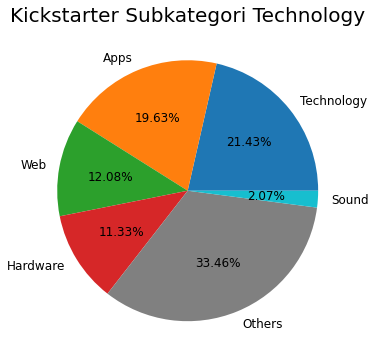

In [133]:
plt.figure(figsize=(8,6),facecolor='w')
plt.pie(Technology['count'],labels=Technology['subkategori'],autopct='%1.2f%%',textprops={'fontsize':12}, \
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'gray', '#17becf']) #plot piechart dengan menunjukkan persentase dan label
plt.title("Kickstarter Subkategori Technology",fontsize=20)
plt.show()

Sekarang kita cek skewness dan kurtosis dataset kita.

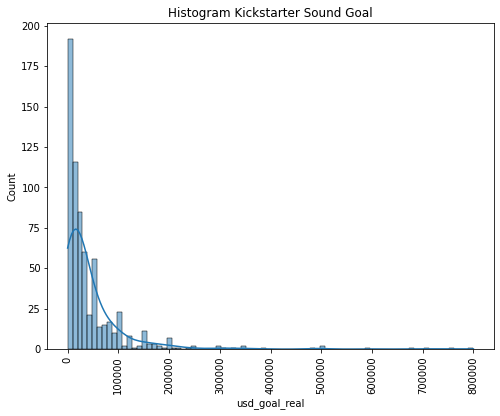

In [134]:
plt.figure(figsize=(8,6))
sns.histplot(df_Sound['usd_goal_real'],kde=True)
plt.title("Histogram Kickstarter Sound Goal")
plt.xticks(rotation=90)
plt.show()

In [135]:
print('Skewness: ',df_Sound['usd_goal_real'].skew())
print('Kurtosis: ',df_Sound['usd_goal_real'].kurt())

Skewness:  5.052655109330886
Kurtosis:  33.18444277742635


Data sangat miring ke kanan dan distribusi leptopkurtik.

## 6. Measure of Central Tendency

Selanjutnya kita akan melihat central tendency dari dataset yang kita miliki.

In [136]:
print('Mean: ', "{:.2f}".format(np.mean(df_Sound['usd_goal_real'])), 'USD') #mean dalam dua desimal
print('Median: ', "{:.2f}".format(np.median(df_Sound['usd_goal_real'])), 'USD') #median dalam dua desimal
print('Modus: ', "{:.2f}".format(df_Sound['usd_goal_real'].mode()[0]), 'USD') #modus dalam dua desimal

Mean:  46710.20 USD
Median:  20000.00 USD
Modus:  50000.00 USD


Dari analisis statistik deskriptif kita temukan bahwa ketiga nilai central tendency berbeda. Kemungkinan besar hal ini terjadi karena ada (banyak) outlier pada data.

## 7. Measure of Variance*

### 7.1. Range

Di Bab 6 telah kita lihat bahwa central tendency dataset ini berbeda sekali. Sekarang kita akan cek rentang dataset untuk memastikan selisih nilai median dan maksimum serta selisih nilai minimum dan maksimum .

In [137]:
print('Nilai minimum: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0))), 'USD') #min dalam dua desimal
print('Nilai Q1: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0.25))), 'USD') #Q1 dalam dua desimal
print('Nilai Q2 (median): ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0.5))), 'USD') #median dalam dua desimal
print('Nilai Q3: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0.75))), 'USD') #Q3 dalam dua desimal
print('Nilai maksimum: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(1))), 'USD') #max dalam dua desimal

Nilai minimum:  1.00 USD
Nilai Q1:  7154.82 USD
Nilai Q2 (median):  20000.00 USD
Nilai Q3:  50000.00 USD
Nilai maksimum:  800000.00 USD


Kalau kita lihat, sampai dengan Q3 data masih dalam puluhan ribu USD, sedangkan nilai maksimum sudah mendekati juta USD. Meskipun data ini valid, tetapi akan mempengaruhi uji hipotesis.

Range dari dataset kita adalah:

In [138]:
print('Range: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(1))-(df_Sound['usd_goal_real'].quantile(0))), 'USD') #range = max - min

Range:  799999.00 USD


Sedangkan selisih nilai maksimum dan mediannya:

In [139]:
print('Max-Median: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(1))-(df_Sound['usd_goal_real'].quantile(0.5))), 'USD') #max - median

Max-Median:  780000.00 USD


Sekarang kita visualisasikan data tersebut ke dalam boxplot.

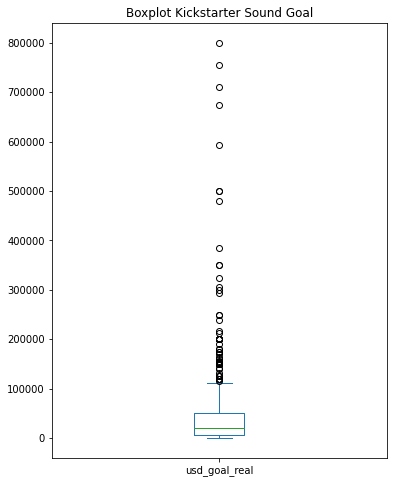

In [140]:
df_Sound['usd_goal_real'].plot(kind='box', figsize=(6,8))
plt.title("Boxplot Kickstarter Sound Goal")
plt.show()

Boxplot terlalu merenggang ke sumbu y karena nilai outlier yang besar sekali. Meskipun data-data tersebut valid, pada analisis ini data tersebut akan dihapus untuk menyederhanakan pengujian hipotesis. Sebelum menghapus data, kita cek dulu Z-score untuk memastikan outlier-nya.

In [141]:
stats.zscore(df_Sound['usd_goal_real']).aggregate(['max','min'])

max    8.969036
min   -0.556143
Name: usd_goal_real, dtype: float64

Ternyata ada yang Z-score mendekati 9, sedangkan batasan outlier menggunakan Z-score adalah lebih dari 3 atau kurang dari -3.

In [142]:
df_Sound.count()

ID               669
name             669
usd_goal_real    669
dtype: int64

In [143]:
Q1 = df_Sound['usd_goal_real'].quantile(0.25)
Q3 = df_Sound['usd_goal_real'].quantile(0.75)
IQR = Q3 - Q1

In [144]:
#deklarasi batas bawah dan batas atas data menggunakan IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-57112.950000000004, 114267.77)

Karena lower_limit bernilai negatif dan nilai terendah data kita adalah 1 USD, maka kita hanya akan menghapus outlier di atas upper_limit.

In [145]:
df_Sound = df_Sound[df_Sound['usd_goal_real']<upper_limit] #filter data, data yang digunakan hanya data dengan nilai di bawah upper limit
df_Sound.count()

ID               610
name             610
usd_goal_real    610
dtype: int64

Ada 59 data yang dihapus. Visualisasikan ulang dengan boxplot.

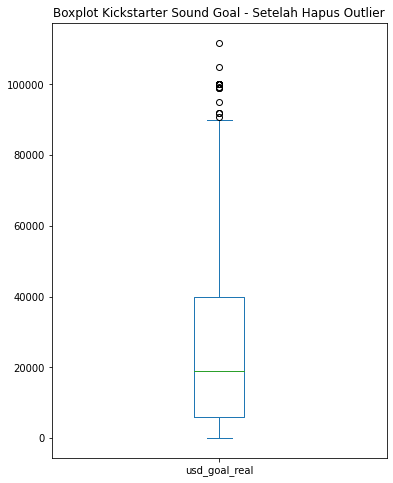

In [146]:
df_Sound['usd_goal_real'].plot(kind='box', figsize=(6,8))
plt.title("Boxplot Kickstarter Sound Goal - Setelah Hapus Outlier")
plt.show()

Hitung ulang central tendency dataset ini.

In [147]:
print('Mean: ', "{:.2f}".format(np.mean(df_Sound['usd_goal_real'])), 'USD')
print('Median: ', "{:.2f}".format(np.median(df_Sound['usd_goal_real'])), 'USD')
print('Modus: ', "{:.2f}".format(df_Sound['usd_goal_real'].mode()[0]), 'USD')

Mean:  27282.42 USD
Median:  19000.00 USD
Modus:  50000.00 USD


Cek ulang rentang dataset.

In [148]:
print('Nilai minimum: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0))), 'USD')
print('Nilai Q1: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0.25))), 'USD')
print('Nilai Q2 (median): ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0.5))), 'USD')
print('Nilai Q3: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(0.75))), 'USD')
print('Nilai maksimum: ', "{:.2f}".format((df_Sound['usd_goal_real'].quantile(1))), 'USD')

Nilai minimum:  1.00 USD
Nilai Q1:  6108.39 USD
Nilai Q2 (median):  19000.00 USD
Nilai Q3:  40000.00 USD
Nilai maksimum:  111790.55 USD


Cek ulang Z-score.

In [149]:
stats.zscore(df_Sound['usd_goal_real']).aggregate(['max','min'])

max    3.140883
min   -1.013959
Name: usd_goal_real, dtype: float64

Dari Z-score masih terdeteksi outlier, tetapi kita tidak akan menghapusnya karena jarak outlier tersebut tidak begitu jauh dari Z-score 3.

Sekarang kita coba visualisasikan dengan histogram.

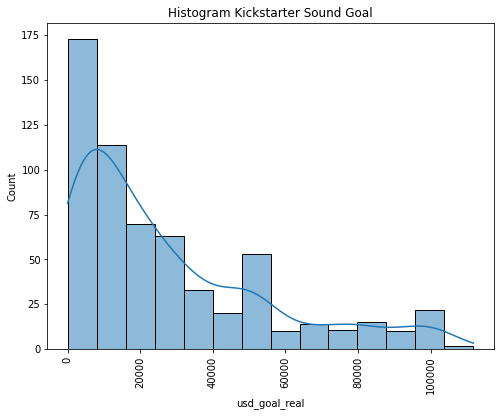

In [150]:
plt.figure(figsize=(8,6))
sns.histplot(df_Sound['usd_goal_real'],kde=True)
plt.title("Histogram Kickstarter Sound Goal")
plt.xticks(rotation=90)
plt.show()

Data terlihat memiliki positive skew meskipun modus lebih besar dibandingkan mean. Kita transformasikan data dengan fungsi logaritmik untuk mengaproksimasi distribusi normal pada uji hipotesis di Bab 8.

In [151]:
df_Sound_log = np.log(df_Sound['usd_goal_real']) #transformasi logaritma natural

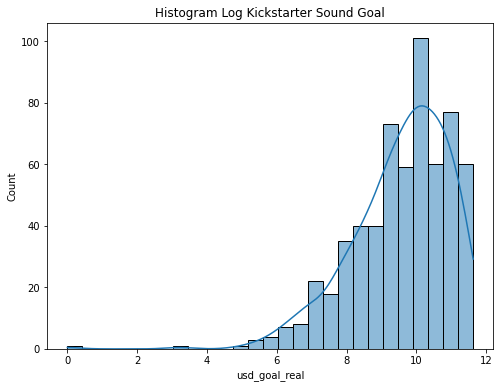

In [152]:
plt.figure(figsize=(8,6))
sns.histplot(df_Sound_log,kde=True)
plt.title("Histogram Log Kickstarter Sound Goal")
plt.show()

Bentuk histogram data sudah lebih mendekati distribusi normal dibandingkan sebelumnya.

### 7.2. Variance

Selanjutnya kita akan menghitung variance dari dataset ini dan juga variance dari logaritma dataset.

In [153]:
print('Variance: ', "{:.2f}".format(np.var(df_Sound['usd_goal_real'])))
print('Variance log: ', "{:.2f}".format(np.var(df_Sound_log)))

Variance:  723924816.73
Variance log:  1.99


### 7.3. Standard Deviation

Pada subbab ini kita akan menghitung nilai standar deviasi dari dataset.

In [154]:
print('Standar deviasi: ', "{:.2f}".format(np.std(df_Sound['usd_goal_real'])))
print('Standar deviasi log: ', "{:.2f}".format(np.std(df_Sound_log)))

Standar deviasi:  26905.85
Standar deviasi log:  1.41


## 8. Hypothesis Testing

Hipotesis yang akan kita uji adalah apakah kickstarter subkategori Sound memiliki rata-rata goal sama dengan 25.000 USD. Kita akan gunakan confidence interval 95% atau critical value 0.05 dan one sample t-test two tailed.

Ubah pernyataan tersebut ke dalam H0 dan H1.
- **H0: μ = 25.000 USD**
- **H1: μ != 25.000 USD**

Karena analisis kita menggunakan dataset dalam logaritma, kita ubah nilai rata-rata tersebut ke dalam logaritma.

In [155]:
hypo = np.log(25000)
hypo

10.126631103850338

Lakukan one sample t-test two tailed.

In [156]:
t_stat,p_val = stats.ttest_1samp(df_Sound_log,hypo) #t-test one sample dengan default two tailed
print('P-value:',p_val) #p-value two tailed
print('t-statistics:',t_stat)

P-value: 3.572704661874482e-22
t-statistics: -10.071958758505213


Karena P-value kurang dari critical value, maka kita tolak H0.

**Terdapat cukup bukti untuk menolak H0.**

Sekarang kita visualisasikan hasil t-test di atas.

C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


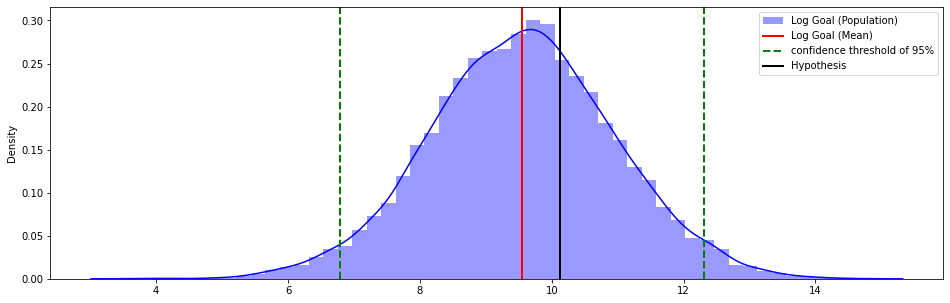

In [157]:
df_Sound_log_pop = np.random.normal(df_Sound_log.mean(), df_Sound_log.std(), 10000) #deklarasi populasi menggunakan mean dan stdev dari sampel logaritma natural

ci = stats.norm.interval(0.95, df_Sound_log.mean(), df_Sound_log.std()) #confidence interval 95% dengan critical value 0.05 atau 0.025 di dua sisi

plt.figure(figsize=(16,5))
sns.distplot(df_Sound_log_pop, label='Log Goal (Population)', color='blue') #data logaritma natural populasi
plt.axvline(df_Sound_log.mean(), color='red', linewidth=2, label='Log Goal (Mean)') #rata-rata logaritma natural sampel

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%') #garis batas confidence interval
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2) #garis batas confidence interval
plt.axvline(np.log(25000), color='black', linestyle='solid', linewidth=2, label='Hypothesis')
plt.legend()

In [158]:
print(f'Rata-rata populasi pada confidence interval 95% adalah {np.exp(df_Sound_log_pop.mean()):.0f} USD, sedangkan rata-rata populasi menurut hipotesis adalah 25000 USD')

Rata-rata populasi pada confidence interval 95% adalah 14123 USD, sedangkan rata-rata populasi menurut hipotesis adalah 25000 USD


## 9. Conclusion

Berdasarkan analisis yang telah dilakukan, terdapat cukup bukti untuk **menolak pernyataan rata-rata kickstarter subkategori Sound memiliki rata-rata goal sama dengan 25.000 USD**.